#The aim is to use clustring technique on the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
data=files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
df=pd.read_csv("Mall_Customers.csv")

In [ ]:
df.rename(columns={"Spending Score (1-100)": "SpendingScore"}, inplace=True)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
 rows, columns= df.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 200
Number of columns: 5


In [ ]:
df.isnull().sum()

CustomerID            0
Gender                0
Age                   0
Annual Income (k$)    0
SpendingScore         0
dtype: int64

# Trying to find clusters in graph using scatter plot

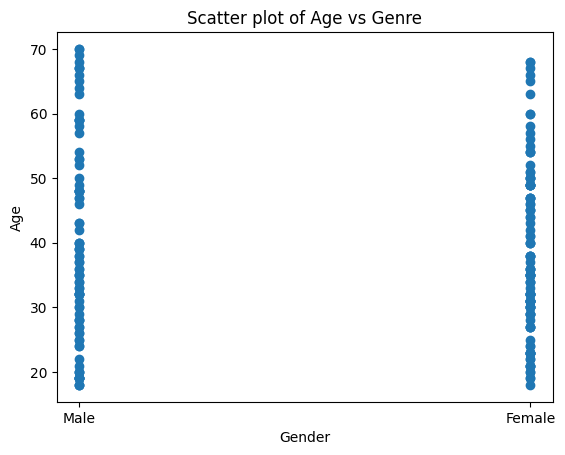

In [ ]:
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Scatter plot of Age vs Genre')

plt.scatter(df['Gender'], df['Age'])

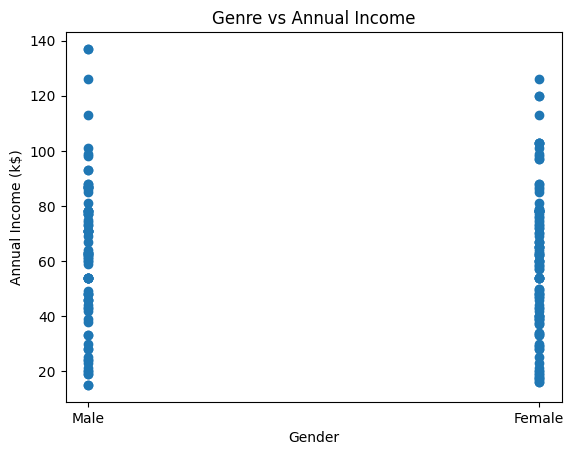

In [ ]:
plt.scatter(df['Gender'], df['Annual Income (k$)'])
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.title('Genre vs Annual Income')
plt.show()

In [ ]:
df.rename(columns={'\tAnnual Income (k$)': 'Annual Income (k$)'}, inplace=True)


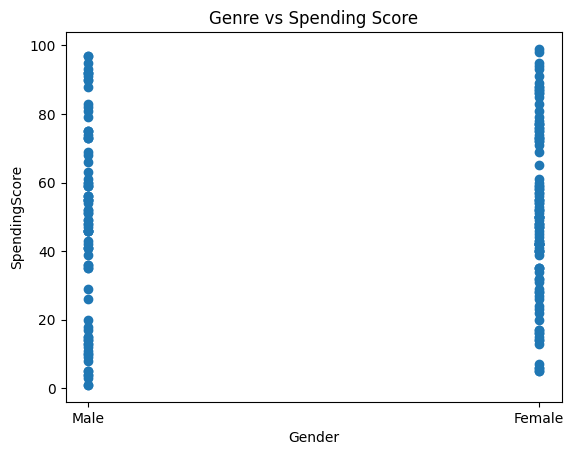

In [ ]:
plt.scatter(df['Gender'], df['SpendingScore'])
plt.xlabel('Gender')
plt.ylabel('SpendingScore')
plt.title('Genre vs Spending Score')
plt.show()

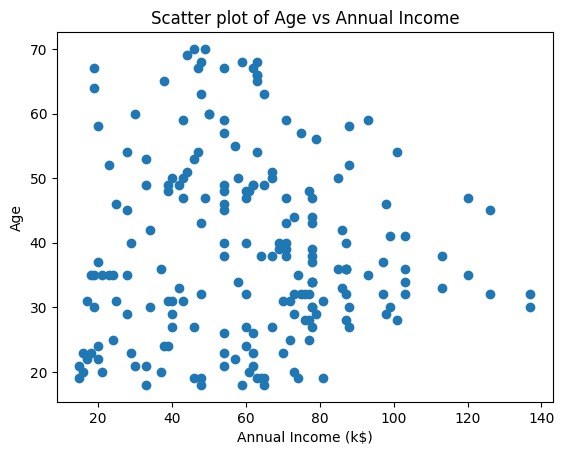

In [ ]:

plt.scatter(df['Annual Income (k$)'], df['Age'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.title('Scatter plot of Age vs Annual Income')
plt.show()

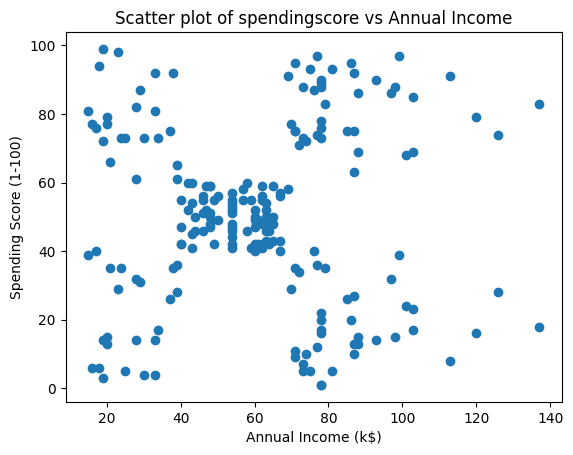

In [ ]:
plt.scatter(df['Annual Income (k$)'], df['SpendingScore'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter plot of spendingscore vs Annual Income')
plt.show()

#Finding the number of clusters using elbow graph technique

Here we can se some clusters

In [ ]:
# Extract 'Spending Score (1-100)' and 'Annual Income (k$)' columns as the input data for clustering
X_scaled = df[['SpendingScore', 'Annual Income (k$)']].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

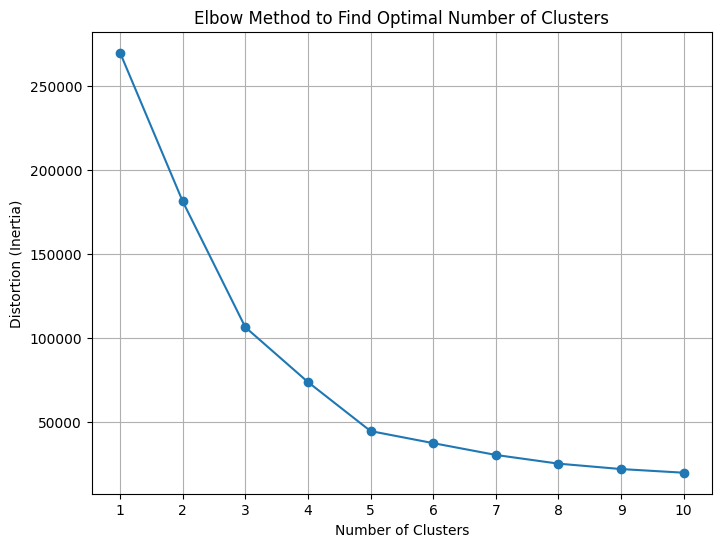

In [ ]:
# Initialize lists to store distortion values and number of clusters
distortions = []
num_clusters_range = range(1, 11)  # Testing with clusters from 1 to 10

# Calculate distortions for different numbers of clusters
for num_clusters in num_clusters_range:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X_scaled)
    distortions.append(km.inertia_)  # Inertia represents the distortion

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(num_clusters_range, distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method to Find Optimal Number of Clusters')
plt.xticks(num_clusters_range)
plt.grid(True)
plt.show()


elbow is observed at 5 so we can assume that there are 5 numbers of clusters

#Identifying clusters seperatly using the k_means method

In [ ]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
centroids = km.cluster_centers_
km.cluster_centers_

NameError: ignored

In [ ]:
df['spendingscore'] = y_predicted

In [ ]:
df1 = df[df['spendingscore'] == 0]
df2 = df[df['spendingscore'] == 1]
df3 = df[df['spendingscore'] == 2]
df4 = df[df['spendingscore'] == 3]
df5 = df[df['spendingscore'] == 4]

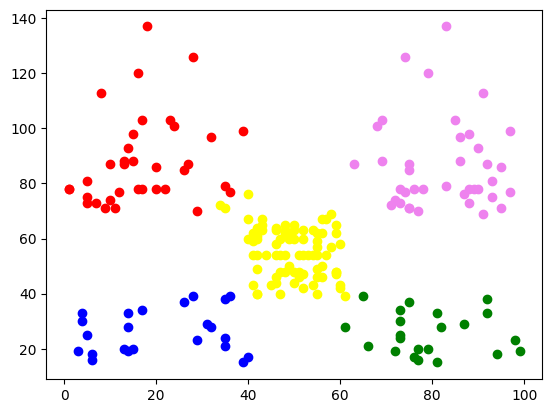

In [ ]:
plt.scatter(df1['SpendingScore'], df1['Annual Income (k$)'], color='green', label='Cluster 0')
plt.scatter(df2['SpendingScore'], df2['Annual Income (k$)'], color='red', label='Cluster 1')
plt.scatter(df3['SpendingScore'], df3['Annual Income (k$)'], color='yellow', label='Cluster 2')
plt.scatter(df4['SpendingScore'], df4['Annual Income (k$)'], color='blue', label='Cluster 3')
plt.scatter(df5['SpendingScore'], df5['Annual Income (k$)'], color='violet', label='Cluster 4')



#plotting the centroid of each cluster

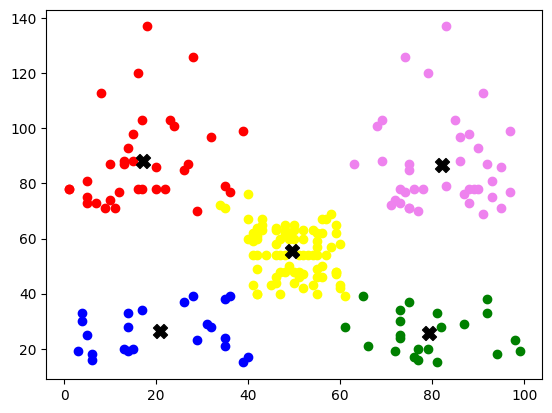

In [ ]:
plt.scatter(df1['SpendingScore'], df1['Annual Income (k$)'], color='green', label='Cluster 0')
plt.scatter(df2['SpendingScore'], df2['Annual Income (k$)'], color='red', label='Cluster 1')
plt.scatter(df3['SpendingScore'], df3['Annual Income (k$)'], color='yellow', label='Cluster 2')
plt.scatter(df4['SpendingScore'], df4['Annual Income (k$)'], color='blue', label='Cluster 3')
plt.scatter(df5['SpendingScore'], df5['Annual Income (k$)'], color='violet', label='Cluster 4')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=100, color='black', label='Centroids')